# 04_1.One Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [ ]:
!pip install pingouin

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
ost_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/04_1.OST.csv', encoding="cp949")
ost_df.head()

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3
2,304.9,301.0,301.0,307.9,309.9,307.9
3,305.2,304.0,304.0,305.2,310.2,305.2
4,304.0,304.0,304.0,307.0,309.0,307.0


### 2.2 자료구조 살펴보기

In [ ]:
ost_df.shape

(102, 6)

In [ ]:
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   무게1     102 non-null    float64
 1   무게2     102 non-null    float64
 2   무게3     102 non-null    float64
 3   무게4     102 non-null    float64
 4   무게5     102 non-null    float64
 5   무게6     102 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


In [ ]:
ost_df.columns

Index(['무게1', '무게2', '무게3', '무게4', '무게5', '무게6'], dtype='object')

## 3.기술통계

In [ ]:
# 수치형 변수
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
무게1,102.0,316.44,12.39,242.0,313.92,317.35,322.50,331.8
무게2,102.0,317.13,12.58,242.0,314.73,318.15,323.30,332.6
무게3,102.0,317.14,12.58,242.0,314.73,318.15,323.30,332.6
무게4,102.0,319.35,12.77,242.0,316.92,320.35,325.50,334.8
무게5,102.0,321.35,12.98,242.0,318.92,322.35,327.50,336.8
무게6,102.0,315.97,12.33,242.0,312.52,317.90,320.68,334.8


In [ ]:
ost_df.agg({"무게1": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T \
    .round(2)

,count,mean,std,min,max,median,skew,kurtosis
무게1,102.0,316.44,12.39,242.0,331.8,317.35,-4.07,22.94


## 4.t-test

### 4.0 scipy.stats와 비교

In [ ]:
# scipy.stats.ttest_1samp
stats.ttest_1samp(ost_df["무게1"], popmean = 320, alternative = "two-sided")

TtestResult(statistic=-2.899472691059131, pvalue=0.004586364436777763, df=101)

### 4.1 차이가 있는 경우(two-sided)

In [ ]:
# two-sided
pg.ttest(ost_df["무게1"], 320, alternative = "two-sided").round(3)

# 5.정규분포 가정 검정후 다시 분석

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.899,101,two-sided,0.005,"[314.01, 318.88]",0.287,5.612,0.819


### 4.2 양측과 단측 검정 비교(less)

In [ ]:
# two-sided
pg.ttest(ost_df["무게2"], 320, alternative = "two-sided").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.3039,101,two-sided,0.0233,"[314.66, 319.6]",0.2281,1.363,0.6263


In [ ]:
# less
pg.ttest(ost_df["무게2"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.304,101,less,0.012,"[-inf, 319.2]",0.228,2.727,0.74


In [ ]:
# two-sided
pg.ttest(ost_df["무게3"], 320, alternative = "two-sided").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.2975,101,two-sided,0.0237,"[314.67, 319.61]",0.2275,1.345,0.6239


In [ ]:
# less
pg.ttest(ost_df["무게3"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.297,101,less,0.012,"[-inf, 319.21]",0.227,2.689,0.738


### 4.3 차이가 없는 경우

In [ ]:
# two-sided
pg.ttest(ost_df["무게4"], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.51,101,two-sided,0.611,"[316.85, 321.86]",0.051,0.124,0.08


In [ ]:
# greater
pg.ttest(ost_df["무게4"], 320, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.51,101,greater,0.694,"[317.26, inf]",0.051,0.249,0.016


### 4.4 차이가 있는 경우(greater)

In [ ]:
# two-sided
pg.ttest(ost_df["무게5"], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.047,101,two-sided,0.298,"[318.8, 323.89]",0.104,0.186,0.179


In [ ]:
# greater
pg.ttest(ost_df["무게5"], 320, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.047,101,greater,0.149,"[319.21, inf]",0.104,0.373,0.272


## 5.정규성 검정

### 5.1 정규성 검정

In [ ]:
pg.normality(ost_df["무게1"])

,W,pval,normal
무게1,0.63365,1.388964e-14,False


In [ ]:
pg.normality(ost_df).T.round(3)

,무게1,무게2,무게3,무게4,무게5,무게6
W,0.63365,0.640934,0.639918,0.620722,0.605953,0.631473
pval,0.0,0.0,0.0,0.0,0.0,0.0
normal,False,False,False,False,False,False


### 5.2 이상치제거

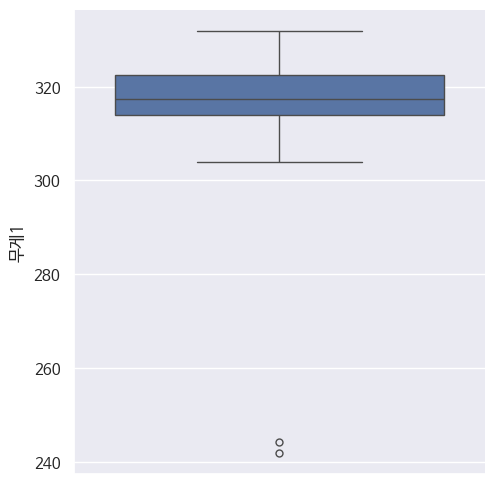

In [ ]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "무게1",
            kind = "box")
plt.show()

In [ ]:
filter = (ost_df["무게1"] <= 250)
ost_df.loc[filter]

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3


In [ ]:
ost_df.drop(ost_df[filter].index, inplace = True)

In [ ]:
pg.normality(ost_df).T.round(3)

# 4.1로 다시 분석

,무게1,무게2,무게3,무게4,무게5,무게6
W,0.981564,0.985788,0.985853,0.984864,0.981564,0.964417
pval,0.175659,0.36139,0.365223,0.310514,0.175659,0.008408
normal,True,True,True,True,True,False


### 5.3 비모수 통계

In [ ]:
# 비모수통계
pg.wilcoxon(ost_df["무게6"] - 320, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1377.0,two-sided,0.0,-0.444,NaN


In [ ]:
# 모수통계 결과와 비교
pg.ttest(ost_df["무게6"], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.295,99,two-sided,0.0,"[321.57, 324.25]",0.429,422.533,0.989


## 6.검증결과 그래프

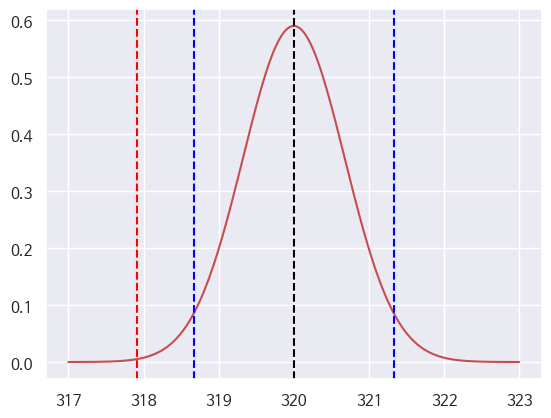

In [ ]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(317, 323, 200)

mu = 320   # 모집단 평균
x = 317.91 # 표본평균
se = 6.77/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = se), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = mu - 1.96 * se, color='blue', linestyle='--')
plt.axvline(x = mu + 1.96 * se, color='blue', linestyle='--')
plt.axvline(x = 317.91, color='red', linestyle='--')
plt.show()

## 7.단일모집단 비율검정(proportion)

In [ ]:
# One Sample T Test of Proportion
from statsmodels.stats.proportion import proportions_ztest

z, p = proportions_ztest(count = 50,
                         nobs = 500,
                         value = 0.09)
print('z : {}, p : {}'.format(z, p))

z : 0.7453559924999305, p : 0.45605654025025566


In [ ]:
# 이항분포로 검정 n*p < 5 일때
stats.binom_test([50, 450], p = 0.09, alternative="two-sided")

<ipython-input-30-1e62f8be38b0>:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test([50, 450], p = 0.09, alternative="two-sided")


0.4341018177288992